# Keras Multiclass 

### Vehicle Classification

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Network Architecture

In [3]:
# Model
model = Sequential()

#Add your convolutional layers
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

2023-09-27 16:08:42.753272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#Flatten
model.add(Flatten())

#Add your fully connected layers
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

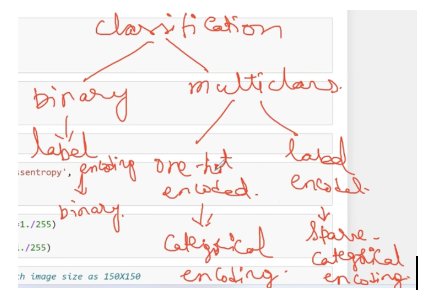

*For multi-class if  one-hot encoded labels then categorical_crossentropy else if label encoded labels then we have sparse_categorical_crossentropy*

*If u have 50 different categories, one hot is going to create 50 different columns to encode so unnecessary, so better label encoding. This one-hot encoding started in tensorflow version1 where multiclass problems had to be on-hot encoded, it never understood label encodings. So that time all multiclass labels had to be converted to ohe, but there is no other special significance of one hot encoding the target*

In [6]:
model.compile(loss='sparse_categorical_crossentropy',  # If label encoded targets
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,           # Min-Max scaling
                                   validation_split=0.2)   

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

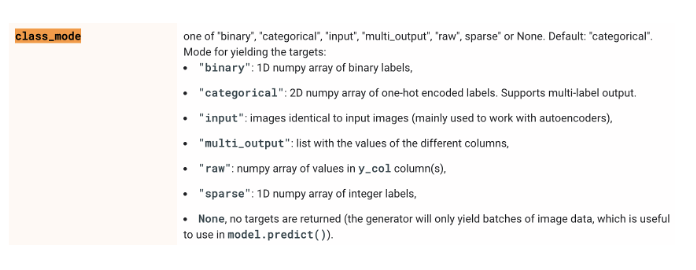

In [9]:
# Read the training data from directory with image size as 150X150

train_set = train_datagen.flow_from_directory('data/vehicle_ds/train',
                                              target_size=(150, 150),
                                              subset='training',
                                              class_mode='sparse')


Found 840 images belonging to 3 classes.


In [10]:
val_set = train_datagen.flow_from_directory('data/vehicle_ds/train',
                                             target_size=(150, 150),
                                             subset='validation',
                                             class_mode='sparse')


Found 210 images belonging to 3 classes.


In [11]:
# Read the test data from directory with image size as 150X150

test_set = test_datagen.flow_from_directory('data/vehicle_ds/test',
                                            target_size=(150, 150),
                                            class_mode='sparse')


Found 105 images belonging to 3 classes.


*<font color=blue>Note*

If u read with class_mode = sparse labels will be label encoded when training, if u change it to 'categorical', the labels will also automatically change to one-hot encoded. In label encoding it is just a vector representing all values, now if one hot encoded it will be a matrix. Hence better to use sparse class mode and sparse_categorical_crossentropy loss for multi-class classification.

In [12]:
train_set.class_indices

{'airplane': 0, 'car': 1, 'motorbike': 2}

*<font color=blue>Note*

*The shape of train_set[0] is not just the first image. Instead, it represents the first batch of images. The shape depends on the batch_size parameter you set in the flow_from_directory method (the default is 32 if you haven't specified it).*



In [13]:
train_set[0]

(array([[[[0.30588236, 0.32156864, 0.33333334],
          [0.39607847, 0.3803922 , 0.36862746],
          [0.24313727, 0.20392159, 0.16862746],
          ...,
          [0.7607844 , 0.74509805, 0.7019608 ],
          [0.5921569 , 0.5882353 , 0.5803922 ],
          [0.57254905, 0.5686275 , 0.56078434]],
 
         [[0.41960788, 0.43529415, 0.44705886],
          [0.32941177, 0.3137255 , 0.3019608 ],
          [0.227451  , 0.18431373, 0.16078432],
          ...,
          [0.7137255 , 0.69803923, 0.654902  ],
          [0.5921569 , 0.5882353 , 0.5803922 ],
          [0.57254905, 0.5686275 , 0.56078434]],
 
         [[0.28235295, 0.3019608 , 0.3137255 ],
          [0.3372549 , 0.33333334, 0.31764707],
          [0.19607845, 0.16078432, 0.13333334],
          ...,
          [0.76470596, 0.7490196 , 0.7058824 ],
          [0.5921569 , 0.5882353 , 0.5803922 ],
          [0.57254905, 0.5686275 , 0.56078434]],
 
         ...,
 
         [[0.83921576, 0.83921576, 0.83921576],
          [0.82745

In [14]:
#Train the model for 5 epochs

model.fit(train_set,epochs=5,validation_data =val_set)


Epoch 1/5
27/27 [==============================] - 15s 536ms/step - loss: 0.9351 - accuracy: 0.5262 - val_loss: 0.6589 - val_accuracy: 0.7286
Epoch 2/5
27/27 [==============================] - 14s 515ms/step - loss: 0.6996 - accuracy: 0.6833 - val_loss: 0.5922 - val_accuracy: 0.7667
Epoch 3/5
27/27 [==============================] - 14s 526ms/step - loss: 0.5582 - accuracy: 0.7583 - val_loss: 0.4196 - val_accuracy: 0.8429
Epoch 4/5
27/27 [==============================] - 14s 510ms/step - loss: 0.4529 - accuracy: 0.8214 - val_loss: 0.4112 - val_accuracy: 0.8333
Epoch 5/5
27/27 [==============================] - 14s 510ms/step - loss: 0.3673 - accuracy: 0.8655 - val_loss: 0.3975 - val_accuracy: 0.8286


In [15]:
#Predictions on the test set:

result=model.predict(test_set)
print(len(result))
result

# It gives probability for each of the 3 classes.

4/4 [==============================] - 1s 125ms/step
105


array([[4.4072160e-05, 9.3408808e-02, 9.0654713e-01],
       [4.9197536e-02, 4.3287626e-01, 5.1792616e-01],
       [1.8728033e-04, 2.9949080e-02, 9.6986365e-01],
       [8.9912228e-06, 9.4302499e-01, 5.6965996e-02],
       [7.9816295e-05, 3.4906474e-01, 6.5085548e-01],
       [9.6029651e-01, 1.0938252e-02, 2.8765304e-02],
       [9.6931702e-01, 1.7794503e-02, 1.2888464e-02],
       [1.2094407e-02, 6.1514717e-01, 3.7275851e-01],
       [8.7941265e-01, 4.3092761e-02, 7.7494659e-02],
       [7.3206692e-04, 1.1670016e-01, 8.8256776e-01],
       [8.4420216e-01, 1.4436923e-01, 1.1428597e-02],
       [5.9232660e-02, 6.1033332e-01, 3.3043402e-01],
       [2.5473982e-01, 4.9802241e-01, 2.4723773e-01],
       [2.5805554e-03, 2.3209368e-01, 7.6532578e-01],
       [2.9126709e-04, 6.2281591e-01, 3.7689278e-01],
       [9.6141255e-01, 2.1537269e-02, 1.7050175e-02],
       [9.9907386e-01, 5.5922940e-04, 3.6686004e-04],
       [5.6488854e-03, 9.3800449e-01, 5.6346595e-02],
       [2.8740391e-03, 8.157

In [16]:
#Evaluate the model

model.evaluate(test_set)

4/4 [==============================] - 1s 119ms/step - loss: 0.8794 - accuracy: 0.7333


[0.8794416189193726, 0.7333333492279053]

**train accuracy: 0.8357, val_accuracy: 0.8571, test acc accuracy: 0.7143**

Possible reasons- Differences in Data Distribution: The validation and test datasets might come from different distributions. For example, the validation set might be more similar to the training data, making it "easier" for the model, whereas the test set might have more challenging or different types of examples. In that scenario, validation accuracy maybe high but the test accuracy maybe low.

Size of the Sets: If the validation set is relatively small, it might not be a good representative of the overall data distribution. A few correct predictions on a small validation set can lead to a high accuracy. Conversely, if the test set is small, a few mistakes can lead to a significant drop in accuracy.





In [17]:
# Randomly check for some images for its predictions and compare it with actual class label

In [18]:
result[96]

array([0.23029746, 0.38386518, 0.38583732], dtype=float32)

In [19]:
result[96].argmax()   # this means max value in 96th array is at index 2.

2

In [20]:
test_set.classes[96]

2

In [21]:
# Randomly check for some images for its predictions and compare it with actual class label
result[96].argmax() == test_set.classes[96]

True

In [22]:
# Randomly check for some images for its predictions and compare it with actual class label
result[0].argmax() == test_set.classes[0]

False

In [23]:
# Inference by loading individual images

In [24]:
# Predict singke new data bike.jpg

In [25]:
#Load the image
from tensorflow.keras.preprocessing import image
test_image= image.load_img('data/vehicle_ds/inference/bike.jpg' ,target_size =(150,150))

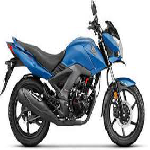

In [26]:
test_image

In [27]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [28]:
# check the shape
test_image.shape

(150, 150, 3)

In [29]:
#Reshape the array
test_image=test_image.reshape(1,150, 150, 3)

In [30]:
#Make predictions
rzlt = model.predict(test_image)

1/1 [==============================] - 0s 55ms/step


In [31]:
rzlt

array([[0., 0., 1.]], dtype=float32)

In [32]:
rzlt=rzlt.argmax()
rzlt

2

In [33]:
## Class label of dog and cat

if rzlt == 0:
    prediction = 'airplane'
elif rzlt == 1:
    prediction = 'car'
else:
    prediction = 'motorbike'
    

In [34]:
prediction

'motorbike'